# 6주차 수업 내용에 대한 미니 과제

로지스틱 회귀의 결정 경계 이해

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 준비: iris 데이터

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 단일 특성에 대한 로지스틱 회귀

## Q1: 특성: petal length, 클래스: 'Iris Setosa' 여부로 데이터 생성

In [ ]:
# 코딩 영역
# X 는 'petal length' 특성을 담은 특성 데이터
# y는 'Iris Setosa' 이면 1 그렇지 않으면 0을 담은 레이블 데이터 

features = iris.data
plen = features[:, 2]
X = plen.reshape(150, 1)

target = iris.target
labels = iris.target_names[target]
y = (labels == 'setosa')*1

In [ ]:
X.shape, y.shape

((150, 1), (150,))

로지스틱 회귀 모형 학습

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Q2: 교재 그림 4-23과 유사한 내용 그려보기 

힌트: 'petal length' 특성의 범위를 조사하여 저자 노트북 셀을 수정할 것

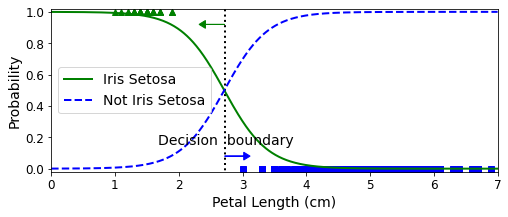

In [ ]:
# 코딩 영역
# 힌트: 'petal length' 특성의 범위를 조사하여 저자 노트북 셀을 수정할 것

X_new = np.linspace(0, 7, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 0] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Setosa")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris Setosa")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, 0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, -0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal Length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, -0.02, 1.02])

plt.show()

레이블 예측 확인

In [ ]:
log_reg.predict([[3.0], [2.4]])

array([0, 1])

# 멀티 특성에 대한 로지스틱 회귀

## Q3: 특성: petal length, petal width, 클래스: 'Iris Setosa' 여부로 데이터 생성

In [ ]:
# 코딩 영역
# X 는 'petal length', 'petal width' 특성을 담은 특성 데이터
# y는 'Iris Setosa' 이면 1 그렇지 않으면 0을 담은 레이블 데이터 

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 0).astype(np.int)

In [ ]:
X.shape, y.shape

((150, 2), (150,))

로지스틱 회귀 모형 학습

In [ ]:
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Q4: 교재 그림 4-24과 유사한 내용 그려보기 

힌트: 저자 노트북 셀을 적절히 가공하여 진행

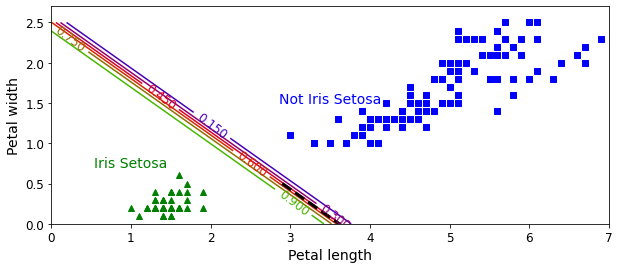

In [ ]:
# 코딩 영역

x0, x1 = np.meshgrid(
        np.linspace(0, 7, 1000).reshape(-1, 1),
        np.linspace(0.0, 2.5, 1000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris Setosa", fontsize=14, color="b", ha="center")
plt.text(1.0, 0.7, "Iris Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0.0, 7, 0.0, 2.7])
plt.show()

## Q5: 위 선형 결정 경계에 대한 분석 내용을 세가지 이상 작성하시오.


1.   점선은 모델이 50% 확률을 추정하는 지점으로 경계는 선형입니다.
2.   15%부터 90%까지 나란한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냅니다.
3.   모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을90% 이상의 확률로 Iris Setosa라고 판단할 것입니다.



# 멀티 특성에 대한 다항 로지스틱 회귀 (소프트맥스 회귀)

## Q6: 특성: 'sepal length', 'petal length' 클래스: 레이블 전체로 하여 생성

In [ ]:
# 코딩 영역
# X 는 'sepal length', 'petal length' 특성을 담은 특성 데이터
# y는 iris["target"] 그대로 사용

X = iris["data"][:, (0, 2)]
y = iris["target"]

In [ ]:
X.shape, y.shape

((150, 2), (150,))

소프트맥스 회귀 학습

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Q7 교재 그림 4-25와 유사한 내용 그려보기

힌트: 저자 노트북 셀을 적절히 가공하여 진행

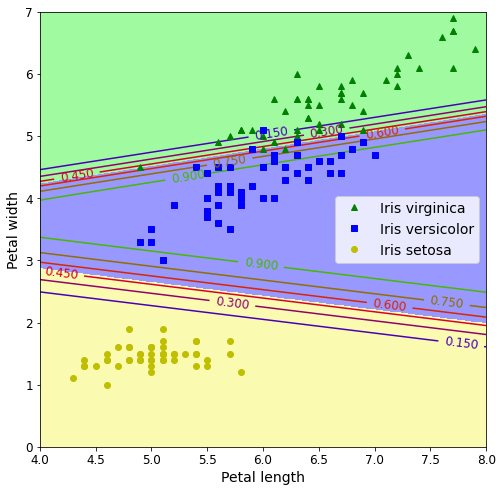

In [ ]:
# 코딩 영역

x0, x1 = np.meshgrid(
        np.linspace(4.0, 8.0, 1000).reshape(-1, 1),
        np.linspace(0, 7, 1000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(8, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([4.0, 8.0, 0, 7])
plt.show()

# 참고
- 각 그림을 그릴 때, np.meshgrid()의 생성 범위나
- 플롯의 경계 (axis)는 적절히 조정해 봅시다.
- 반드시 강사가 그린 그림과 모든게 동일할 필요는 없습니다.